# **Importing the data and explore it and preprocess it as needed**

In [1]:
import pandas as pd


In [2]:
data1 = pd.read_csv('Train_Data/Train.csv')
data2 = pd.read_csv('Train_Data/Train_Vehicletravellingdata.csv')
data3 = pd.read_csv('Train_Data/Train_WeatherData.csv')

In [3]:
data1.shape

(12994, 5)

In [4]:
data2.shape

(162566, 10)

In [5]:
data3.shape

(162566, 9)

In [6]:
print(data1.columns)
print(data2.columns)
print(data3.columns)

Index(['ID', 'V2', 'V5', 'V6', 'DrivingStyle'], dtype='object')
Index(['ID', 'V1', 'V3', 'V4', 'V7', 'V8', 'V9', 'V10', 'V11', 'V18'], dtype='object')
Index(['ID', 'V1', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V19'], dtype='object')


In [7]:
data1 = data1.rename(columns = {'V2':'veincle length' ,
                        'V5':'veincle weight' ,
                        'V6':'axles number'})

In [8]:
data2 = data2.rename(columns = {'V1':'time of collection' ,
                        'V3':'Lane of the road' ,
                        'V4':'veincle speed',
                        'V7':'perceding Veincle ID',
                        'V8':'perceding veincle speed',
                        'V9':'perceding veincle weight',
                        'V10':'perceding veincle length',
                        'V11':'perceding veincle time-gap',
                        'V18':'road condition'})

In [9]:
data3 = data3.rename(columns = {'V1':'time of collection' ,
                        'V12':'Air temprture' ,
                        'V13':'perciption type',
                        'V14':'perciption intensity',
                        'V15':'relatve humadity',
                        'V16':'wind direction',
                        'V17':'wind speed',
                        'V19':'Lighting condition'})

In [10]:
print(data1.columns)
print(data2.columns)
print(data3.columns)

Index(['ID', 'veincle length', 'veincle weight', 'axles number',
       'DrivingStyle'],
      dtype='object')
Index(['ID', 'time of collection', 'Lane of the road', 'veincle speed',
       'perceding Veincle ID', 'perceding veincle speed',
       'perceding veincle weight', 'perceding veincle length',
       'perceding veincle time-gap', 'road condition'],
      dtype='object')
Index(['ID', 'time of collection', 'Air temprture', 'perciption type',
       'perciption intensity', 'relatve humadity', 'wind direction',
       'wind speed', 'Lighting condition'],
      dtype='object')


In [11]:
data1.isnull().sum()

ID                0
veincle length    0
veincle weight    0
axles number      0
DrivingStyle      0
dtype: int64

In [12]:
data2.isnull().sum()

ID                               0
time of collection               0
Lane of the road                 0
veincle speed                    0
perceding Veincle ID             0
perceding veincle speed          0
perceding veincle weight         0
perceding veincle length         0
perceding veincle time-gap    2455
road condition                   0
dtype: int64

In [13]:
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture           2057
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [14]:
data1.isna().sum()


ID                0
veincle length    0
veincle weight    0
axles number      0
DrivingStyle      0
dtype: int64

In [15]:
data2.isna().sum()


ID                               0
time of collection               0
Lane of the road                 0
veincle speed                    0
perceding Veincle ID             0
perceding veincle speed          0
perceding veincle weight         0
perceding veincle length         0
perceding veincle time-gap    2455
road condition                   0
dtype: int64

In [16]:
data3.isna().sum()

ID                         0
time of collection         0
Air temprture           2057
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [17]:
print(int(data2['perceding veincle time-gap'].mean()))
print(int(data2['perceding veincle time-gap'].median()))
data2['perceding veincle time-gap'].fillna( value = int(data2['perceding veincle time-gap'].median()),inplace= True)
#data2['perceding veincle time-gap'].skew()
data2.isnull().sum()

105
43


ID                            0
time of collection            0
Lane of the road              0
veincle speed                 0
perceding Veincle ID          0
perceding veincle speed       0
perceding veincle weight      0
perceding veincle length      0
perceding veincle time-gap    0
road condition                0
dtype: int64

In [18]:
print(int(data3['Air temprture'].mean()))
print(int(data3['Air temprture'].median()))
data3['Air temprture'].fillna( value = int(data3['Air temprture'].median()),inplace= True)

#data3.isnull().sum()

4
5


In [19]:
data2['road condition'] = pd.factorize(data2['road condition'])[0]

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          162566 non-null  object 
 1   time of collection          162566 non-null  object 
 2   Lane of the road            162566 non-null  int64  
 3   veincle speed               162566 non-null  int64  
 4   perceding Veincle ID        162566 non-null  int64  
 5   perceding veincle speed     162566 non-null  int64  
 6   perceding veincle weight    162566 non-null  int64  
 7   perceding veincle length    162566 non-null  int64  
 8   perceding veincle time-gap  162566 non-null  float64
 9   road condition              162566 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 12.4+ MB


In [21]:
data2_gropued = data2.groupby('ID')[['perceding veincle time-gap','Lane of the road','veincle speed','perceding veincle speed','perceding veincle weight','perceding veincle length','road condition']].mean()

In [22]:
data2_gropued.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12994 entries, DR_10002 to DR_75253
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   perceding veincle time-gap  12994 non-null  float64
 1   Lane of the road            12994 non-null  float64
 2   veincle speed               12994 non-null  float64
 3   perceding veincle speed     12994 non-null  float64
 4   perceding veincle weight    12994 non-null  float64
 5   perceding veincle length    12994 non-null  float64
 6   road condition              12994 non-null  float64
dtypes: float64(7)
memory usage: 812.1+ KB


In [23]:
data2_gropued = data2_gropued.astype({'Lane of the road':int})

In [24]:
data2_gropued.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12994 entries, DR_10002 to DR_75253
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   perceding veincle time-gap  12994 non-null  float64
 1   Lane of the road            12994 non-null  int64  
 2   veincle speed               12994 non-null  float64
 3   perceding veincle speed     12994 non-null  float64
 4   perceding veincle weight    12994 non-null  float64
 5   perceding veincle length    12994 non-null  float64
 6   road condition              12994 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 812.1+ KB


In [25]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12994 entries, 0 to 12993
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              12994 non-null  object
 1   veincle length  12994 non-null  int64 
 2   veincle weight  12994 non-null  int64 
 3   axles number    12994 non-null  int64 
 4   DrivingStyle    12994 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 507.7+ KB


In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          162566 non-null  object 
 1   time of collection          162566 non-null  object 
 2   Lane of the road            162566 non-null  int64  
 3   veincle speed               162566 non-null  int64  
 4   perceding Veincle ID        162566 non-null  int64  
 5   perceding veincle speed     162566 non-null  int64  
 6   perceding veincle weight    162566 non-null  int64  
 7   perceding veincle length    162566 non-null  int64  
 8   perceding veincle time-gap  162566 non-null  float64
 9   road condition              162566 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 12.4+ MB


In [27]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    162566 non-null  object 
 1   time of collection    162566 non-null  object 
 2   Air temprture         162566 non-null  float64
 3   perciption type       162566 non-null  object 
 4   perciption intensity  162566 non-null  object 
 5   relatve humadity      160461 non-null  float64
 6   wind direction        160452 non-null  float64
 7   wind speed            160102 non-null  float64
 8   Lighting condition    162566 non-null  object 
dtypes: float64(4), object(5)
memory usage: 11.2+ MB


In [28]:
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [29]:
print(int(data3['relatve humadity'].mean()))
print(int(data3['relatve humadity'].median()))

60
58


In [30]:
data3['relatve humadity'].fillna( value = data3['relatve humadity'].median)
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction          2114
wind speed              2464
Lighting condition         0
dtype: int64

In [31]:
print(int(data3['wind direction'].mean()))
print(int(data3['wind direction'].median()))

182
180


In [32]:
data3['wind direction'].fillna( value = int(data3['wind direction'].median()),inplace= True)
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction             0
wind speed              2464
Lighting condition         0
dtype: int64

In [33]:
print(int(data3['wind speed'].mean()))
print(int(data3['wind speed'].median()))

4
4


In [34]:
data3['wind speed'].fillna( value = int(data3['wind speed'].median()),inplace= True)
data3.isnull().sum()

ID                         0
time of collection         0
Air temprture              0
perciption type            0
perciption intensity       0
relatve humadity        2105
wind direction             0
wind speed                 0
Lighting condition         0
dtype: int64

In [35]:
data3['perciption type'] = pd.factorize(data3['perciption type'])[0]
data3['perciption intensity'] = pd.factorize(data3['perciption intensity'])[0]
data3['Lighting condition'] = pd.factorize(data3['Lighting condition'])[0]

In [36]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162566 entries, 0 to 162565
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    162566 non-null  object 
 1   time of collection    162566 non-null  object 
 2   Air temprture         162566 non-null  float64
 3   perciption type       162566 non-null  int64  
 4   perciption intensity  162566 non-null  int64  
 5   relatve humadity      160461 non-null  float64
 6   wind direction        162566 non-null  float64
 7   wind speed            162566 non-null  float64
 8   Lighting condition    162566 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 11.2+ MB


In [37]:
data3_gropued = data3.groupby('ID')[['Air temprture','perciption type','perciption intensity','relatve humadity','wind direction','wind speed','Lighting condition']].mean()

In [38]:
data2_gropued.head()

,perceding veincle time-gap,Lane of the road,veincle speed,perceding veincle speed,perceding veincle weight,perceding veincle length,road condition
ID,,,,,,,
DR_10002,234.800000,1,84.400000,77.000000,4200.400000,762.000000,0.0
DR_10013,173.111111,1,86.555556,85.777778,9517.888889,1184.888889,0.0
DR_10023,66.812500,1,83.125000,81.625000,10180.187500,1022.312500,0.0
DR_10024,194.166667,1,86.666667,81.500000,6366.333333,1069.666667,0.0
DR_10025,156.125000,1,81.500000,82.500000,10157.875000,1113.625000,1.0


In [39]:
data3_gropued.head()

,Air temprture,perciption type,perciption intensity,relatve humadity,wind direction,wind speed,Lighting condition
ID,,,,,,,
DR_10002,2.2000,0.0,0.0,66.6000,173.200,5.8000,0.0
DR_10013,4.0000,0.0,0.0,58.0000,163.000,8.0000,2.0
DR_10023,6.0625,0.0,0.0,34.0625,205.875,3.0625,2.0
DR_10024,5.0000,2.0,2.0,NaN,180.000,4.0000,1.0
DR_10025,1.0000,0.0,0.0,87.0000,11.000,3.0000,2.0


In [40]:
data1.head()

,ID,veincle length,veincle weight,axles number,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2


In [41]:
print(data1.shape)
print(data2_gropued.shape)
print(data3_gropued.shape)

(12994, 5)
(12994, 7)
(12994, 7)


In [42]:
data1['ID'].drop_duplicates

<bound method Series.drop_duplicates of 0        DR_24526
1        DR_30052
2        DR_40928
3        DR_66033
4        DR_45266
           ...   
12989    DR_61322
12990    DR_35712
12991    DR_61590
12992    DR_69505
12993    DR_56117
Name: ID, Length: 12994, dtype: object>

In [43]:
merged_data = pd.merge(data2_gropued,data3_gropued, on ='ID')

In [44]:
merged_data2 = pd.merge(data1,merged_data, on='ID')

In [45]:
merged_data2.head()

,ID,veincle length,veincle weight,axles number,DrivingStyle,perceding veincle time-gap,Lane of the road,veincle speed,perceding veincle speed,perceding veincle weight,perceding veincle length,road condition,Air temprture,perciption type,perciption intensity,relatve humadity,wind direction,wind speed,Lighting condition
0,DR_24526,1265,10243,2,2,67.842105,1,87.473684,87.052632,8443.789474,965.473684,0.0,7.000000,0.0,0.0,95.000000,125.157895,0.052632,0.0
1,DR_30052,1680,30871,6,2,138.363636,1,82.272727,86.090909,6887.000000,920.636364,0.0,4.636364,0.0,0.0,95.545455,157.818182,6.000000,0.0
2,DR_40928,936,3224,4,2,159.545455,1,85.090909,82.454545,4624.363636,773.909091,0.0,1.545455,1.0,1.0,95.000000,64.454545,0.000000,0.0
3,DR_66033,1503,3315,4,2,118.454545,1,82.818182,83.727273,9229.909091,1210.545455,0.0,3.545455,0.0,0.0,95.000000,169.727273,1.363636,0.0
4,DR_45266,929,3022,4,2,109.500000,1,82.750000,82.916667,3058.416667,723.583333,0.0,3.000000,0.0,0.0,95.000000,191.000000,3.000000,0.0


In [46]:
merged_data2.isnull().sum()

ID                              0
veincle length                  0
veincle weight                  0
axles number                    0
DrivingStyle                    0
perceding veincle time-gap      0
Lane of the road                0
veincle speed                   0
perceding veincle speed         0
perceding veincle weight        0
perceding veincle length        0
road condition                  0
Air temprture                   0
perciption type                 0
perciption intensity            0
relatve humadity              137
wind direction                  0
wind speed                      0
Lighting condition              0
dtype: int64

In [47]:
merged_data2 = merged_data2.dropna(subset=['relatve humadity'])
merged_data2 = merged_data2.drop('ID',axis = 1)

In [48]:
merged_data2.isnull().sum()

veincle length                0
veincle weight                0
axles number                  0
DrivingStyle                  0
perceding veincle time-gap    0
Lane of the road              0
veincle speed                 0
perceding veincle speed       0
perceding veincle weight      0
perceding veincle length      0
road condition                0
Air temprture                 0
perciption type               0
perciption intensity          0
relatve humadity              0
wind direction                0
wind speed                    0
Lighting condition            0
dtype: int64

In [49]:
merged_data2.columns

Index(['veincle length', 'veincle weight', 'axles number', 'DrivingStyle',
       'perceding veincle time-gap', 'Lane of the road', 'veincle speed',
       'perceding veincle speed', 'perceding veincle weight',
       'perceding veincle length', 'road condition', 'Air temprture',
       'perciption type', 'perciption intensity', 'relatve humadity',
       'wind direction', 'wind speed', 'Lighting condition'],
      dtype='object')

In [50]:
merged_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12857 entries, 0 to 12993
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   veincle length              12857 non-null  int64  
 1   veincle weight              12857 non-null  int64  
 2   axles number                12857 non-null  int64  
 3   DrivingStyle                12857 non-null  int64  
 4   perceding veincle time-gap  12857 non-null  float64
 5   Lane of the road            12857 non-null  int64  
 6   veincle speed               12857 non-null  float64
 7   perceding veincle speed     12857 non-null  float64
 8   perceding veincle weight    12857 non-null  float64
 9   perceding veincle length    12857 non-null  float64
 10  road condition              12857 non-null  float64
 11  Air temprture               12857 non-null  float64
 12  perciption type             12857 non-null  float64
 13  perciption intensity        128

In [51]:
merged_data2.shape

(12857, 18)

# **Building differnent models and see which is the best model for the dataset**

---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7498379779650033
f1 score = 0.7216144508267517
precision = 0.724992949255577
recall =  0.720691260599077
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7556707712248866
f1 score = 0.7293089099406829
precision = 0.731579507206331
recall =  0.7289998118306166
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7504860661049902
f1 score = 0.7241487960572289
precision = 0.7267767014784722
recall =  0.7237822822036382
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7453013609850939
f1 score = 0.716967942375633
precision = 0.7186039611456588
recall =  0.7176904439051549
---------------------------------
---------------------------------
[3 2 3 ... 1 2 2]
accuracy = 0.7433570965651328
f1 score = 0.7161924746630385
precision = 0.7181709670929267
rec

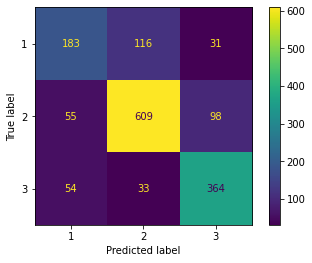

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as met
from sklearn.preprocessing import StandardScaler
X = merged_data2.drop('DrivingStyle' , axis = 1)
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
scaler =StandardScaler()
x_train_scaled = scaler.fit_transform(X)
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

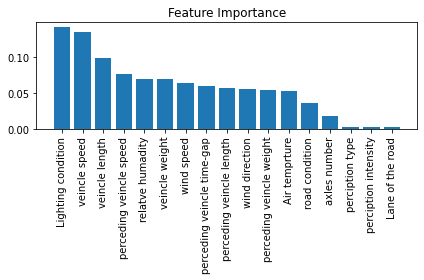

In [53]:
import numpy as np
importances = clf2.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = X.columns[1:]

plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [54]:
print(importances[sorted_indices])

[0.14119042 0.1348375  0.09863277 0.07708267 0.07025679 0.0689263
 0.06468572 0.06019361 0.05692465 0.05571771 0.0545652  0.05271885
 0.03667213 0.01872961 0.00339199 0.00308434 0.00238972]


---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7530784186649384
f1 score = 0.7270486888895951
precision = 0.7290324931618746
recall =  0.7272500305532761
---------------------------------
---------------------------------
[2 1 3 ... 1 2 2]
accuracy = 0.7453013609850939
f1 score = 0.7153908323737546
precision = 0.718614036516965
recall =  0.714464211929163
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7504860661049902
f1 score = 0.7230432170288706
precision = 0.725517776023254
recall =  0.7229079735321333
---------------------------------
---------------------------------
[3 1 3 ... 2 2 2]
accuracy = 0.7478937135450421
f1 score = 0.7197964805328723
precision = 0.7228433189074813
recall =  0.7191079219310446
---------------------------------
---------------------------------
[2 2 3 ... 1 2 2]
accuracy = 0.7524303305249513
f1 score = 0.7267111871763033
precision = 0.7278490790255496
re

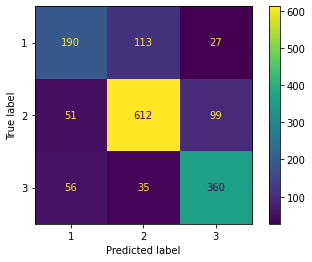

In [55]:
X = merged_data2.drop(['DrivingStyle','perciption type','perciption intensity','Lane of the road'] , axis = 1)
y = merged_data2['DrivingStyle']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=123)
avgList = []
for x in range(10):
  clf2=RandomForestClassifier(n_estimators=150,max_depth=100,min_samples_split=3,oob_score=True)
  clf2.fit(x_train,y_train)
  y_pred = clf2.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
  avgList.append(met.accuracy_score(y_test,y_pred))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("average =" ,sum(avgList)/len(avgList))
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [56]:
for x in range(10):
  scaler =StandardScaler()
  scaler.fit_transform(X)
  neigh = KNeighborsClassifier(n_neighbors=2,leaf_size=30,p=2,algorithm='ball_tree')
  neigh.fit(X, y)
  y_pred = neigh.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.7141931302657162
f1 score = 0.6723713945771053
precision = 0.7817573277266815
recall =  0.7138758431249309
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.7141931302657162
f1 score = 0.6723713945771053
precision = 0.7817573277266815
recall =  0.7138758431249309
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.7141931302657162
f1 score = 0.6723713945771053
precision = 0.7817573277266815
recall =  0.7138758431249309
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.7141931302657162
f1 score = 0.6723713945771053
precision = 0.7817573277266815
recall =  0.7138758431249309
---------------------------------
---------------------------------
[1 1 2 ... 2 2 2]
accuracy = 0.7141931302657162
f1 score = 0.6723713945771053
precision = 0.7817573277266815

In [57]:
#from sklearn.pipeline import make_pipeline
#from sklearn.svm import SVC
#for x in range(10):
  #clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
  #clf2.fit(X, y)
  #y_pred = clf2.predict(x_test)
  #print("---------------------------------")
  #print("---------------------------------")
  #print(y_pred)
  #print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  #print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  #print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  #print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

---------------------------------
---------------------------------
---------------------------------
---------------------------------


In [58]:
from sklearn.linear_model import LogisticRegression
for x in range(10):
  clf = LogisticRegression(multi_class='multinomial').fit(X, y)
  y_pred = clf.predict(x_test)
  print("---------------------------------")
  print("---------------------------------")
  print(y_pred)
  print("accuracy =" ,met.accuracy_score(y_test,y_pred))
  print("f1 score =" ,met.f1_score(y_test,y_pred,average='macro'))
  print("precision =",met.precision_score(y_test,y_pred,average='macro'))
  print("recall = ",met.recall_score(y_test,y_pred,average='macro'))
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")
print("---------------------------------")

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077
---------------------------------
---------------------------------
[2 1 2 ... 2 2 2]
accuracy = 0.5106934543097861
f1 score = 0.3530321869432034
precision = 0.46097467101438977
recall =  0.40664567705090077
---------------------------------
---------------------------------
---------------------------------
---------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [59]:
#merged_data2.corr()

In [60]:
#plt.figure(figsize=(17,17))
#import seaborn as sns
#sns.heatmap(merged_data2.corr(), annot = True, fmt='.2g')
